In [63]:
# web scraping libraries
from urllib.request import urlopen #to open urls
from bs4 import BeautifulSoup #to extract data from html files
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12,8) #default plot size

#NLTK
from wordcloud import WordCloud, STOPWORDS # word clouds


## Creating Beautiful Soup object

In [64]:
url = "https://www.learndatasci.com/free-data-science-books/"

# get html of page
html = urlopen(url)

# create bs object
soup = BeautifulSoup(html, 'lxml') # using lxml parser

### Title of website

In [65]:
title = soup.title
print(title.get_text())

100+ Free Data Science Books – LearnDataSci


### HTML of a single book

In [66]:
books = soup.find_all('section', attrs={'class': ""}) # for book section only

book_1 = books[0]
print(book_1.prettify())

<section>
 <div class="book row" isbn-data="0136042597">
  <div class="col-lg-4">
   <div style="width:100%;">
    <img alt="Artificial Intelligence A Modern Approach, 1st Edition" class="book-cover" height="261" loading="lazy" src="https://storage.googleapis.com/lds-media/images/Artificial-Intelligence-A-Modern-Approach_2015.width-200.png" width="200"/>
   </div>
  </div>
  <div class="col-lg-8">
   <div class="star-ratings">
    <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
    <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
    <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
    <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
    <img src="https://storage.googleapis.com/lds-static/imgs/star-outline.svg"/>
    <b>
     4.2
    </b>
    <span>
     (352 Ratings)
    </span>
    <button data-tooltip="Good Reads: 4.2">
     ?
    </button>
   </div>
   <div class="star-ratin

### Selecting necessary information

In [67]:
rating = book_1.find(class_= 'star-ratings').find('b').get_text()
total_ratings = book_1.find(class_ = 'star-ratings').find('span').get_text()
total_ratings = re.search(r'\d+', total_ratings).group() #for numebers
book_cat = book_1.find('h2').get_text()
title = book_1.find('h2').get_text()
author, year = book_1.find(class_ = 'meta-auth').find('b').get_text().split(', ')
desc = book_1.find('p').get_text()
links = book_1.find_all('a')
book_link = links[0].get('href')
review_link = links[1].get('href')


print(f"title: {title}")
print(f"category: {book_cat}")
print(f"author: {author}")
print(f"year: {year}")
print(f"rating: {rating}")
print(f"total_ratings: {total_ratings}")
print(f"description: {desc}")
print(f"link: {book_link}")
print(f"review link: {review_link}")

title: Artificial Intelligence A Modern Approach, 1st Edition
category: Artificial Intelligence A Modern Approach, 1st Edition
author: Stuart Russell
year: 1995
rating: 4.2
total_ratings: 352
description: Comprehensive, up-to-date introduction to the theory and practice of artificial intelligence. Number one in its field, this textbook is ideal for one or two-semester, undergraduate or graduate-level courses in Artificial Intelligence.
link: http://www.cin.ufpe.br/~tfl2/artificial-intelligence-modern-approach.9780131038059.25368.pdf
review link: http://www.amazon.com/gp/product/0136042597/ref=as_li_tl?ie=UTF8&camp=1789&creative=9325&creativeASIN=0136042597&linkCode=as2&tag=learnds-20&linkId=3FRORB7P56CEWSK5


### Dealing with the missing components
 - Books without year
 - Books without rating
 - Books without review links
 - books without description

In [68]:
book7 = books[7] # book without year
book35 = books[35] # book without year but multiple author
book17 = books[17] # book with multiple authors

print(book_1.find(class_='meta-auth').find('b').get_text())
print(book7.find(class_='meta-auth').find('b').get_text())
print(book35.find(class_='meta-auth').find('b').get_text())
print(book17.find(class_='meta-auth').find('b').get_text())

Stuart Russell, 1995
Jeff Leek
Jeffrey Stanton, Syracuse University
Yoshua Bengio, Ian J. Goodfellow, & Aaron Courville, 2015


In [69]:
author = book_1.find(class_='meta-auth').find('b').get_text()
author = book7.find(class_='meta-auth').find('b').get_text()
author = book17.find(class_='meta-auth').find('b').get_text()
author = book35.find(class_='meta-auth').find('b').get_text()

# some books don't have year and has multiple authors
if (re.search(r'\d+', author) != None):
  author_year = author.split(", ")
  author = ", ".join(str for str in author_year[:-1])
  year = author_year[-1]
else:
  year = None

print(author)
print(year)

Jeffrey Stanton, Syracuse University
None


In [70]:
book23 = books[23] # book without rating

print(book_1.find(class_='star-ratings').prettify())
print()
print(book23.find(class_='star-ratings').prettify())

<div class="star-ratings">
 <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/filled-star.svg"/>
 <img src="https://storage.googleapis.com/lds-static/imgs/star-outline.svg"/>
 <b>
  4.2
 </b>
 <span>
  (352 Ratings)
 </span>
 <button data-tooltip="Good Reads: 4.2">
  ?
 </button>
</div>


<div class="star-ratings">
</div>



In [71]:
# rating = book1.find(class_='star-ratings').find('b')
# total_ratings = book1.find(class_='star-ratings').find('span')
rating = book23.find(class_='star-ratings').find('b')
total_ratings = book23.find(class_='star-ratings').find('span')

# some books don't have ratings
if (rating != None and total_ratings != None):
  rating = rating.get_text()
  total_ratings = total_ratings.get_text()
  total_ratings = re.search(r'\d+', total_ratings).group()


print(rating)
print(total_ratings)

None
None


In [72]:
book8 = books[8] # book without review link

print(len(book_1.find_all('a')))
print(len(book8.find_all('a')))

2
1


In [73]:
links = book8.find_all('a')
book_link = links[0].get('href')

if (len(links) == 2):
  review_link = links[1].get('href')
else:
  review_link = None
  
print(book_link)
print(review_link)

http://ciml.info/dl/v0_9/ciml-v0_9-all.pdf
None


In [74]:
book13 = books[13] # book without desc

print(book_1.find('p'))
print(book13.find('p'))

<p>Comprehensive, up-to-date introduction to the theory and practice of artificial intelligence. Number one in its field, this textbook is ideal for one or two-semester, undergraduate or graduate-level courses in Artificial Intelligence.</p>
None


### Get information for each book and add to the lists
creating lsit for each type, and use a funciton to appear info of each books to the list

In [75]:
# Creating the lists
title_list = []
book_cat_list = []
author_list = []
year_list = []
rating_list = []
total_ratings_list = []
description_list = []
book_link_list = []
review_link_list = []

In [76]:
def getInfo(book):

    # get and add title data
    title = book.find('h2')
    title_list.append(title.get_text())

    book_cat = book.find(class_ = 'book-cats')
    if book_cat != None:
        book_cat = book_cat.get_text()
    book_cat_list.append(book_cat)

    # get auther and year data
    author = book.find(class_ = 'meta-auth').find('b').get_text()

    # some books dont have years and same books have multiple author
    if (re.search(r'\d+', author) != None):
        author_year = author.split(", ")
        author = ', '.join(str for str in author_year[:-1])
        year = author_year[-1]
    
    else:
        year = None

    author_list.append(author)
    year_list.append(year)

    # get rating and totla number of ratings
    rating = book.find(class_ = 'star-ratings').find('b')
    total_ratings = book.find(class_='star-ratings').find('span')

    # some books dont have ratings
    if  (rating != None and total_ratings != None):
        rating = rating.get_text()
        total_ratings = total_ratings.get_text()
        total_ratings = re.search(r'\d+', total_ratings).group() #get numbers only
    
    rating_list.append(rating)
    total_ratings_list.append(total_ratings)

    # get description
    desc = book.find('p')

    # books without description
    if (desc != None):
        desc = desc.get_text()
    
    description_list.append(desc)

    # get book links and reviews links
    links = book.find_all('a')

    book_link = links[0].get('href')
    book_link_list.append(book_link)

    # some books don't have links

    if (len(links) == 2):
        review_link = links[1].get('href')
    else:
        review_link = None
    
    review_link_list.append(review_link)

In [77]:
for book in books:
  getInfo(book)

## Building pandas DataFrame

In [78]:
df_books = pd.DataFrame({
    "title": title_list,
    "book_cat" : book_cat_list,
    "author": author_list,
    "year": year_list,
    "rating": rating_list, 
    "total_ratings": total_ratings_list,
    "description": description_list,
    "book_link": book_link_list,
    "review_link":review_link_list
})
df_books.head()

,title,book_cat,author,year,rating,total_ratings,description,book_link,review_link
0,"Artificial Intelligence A Modern Approach, 1st...",Artificial Intelligence,Stuart Russell,1995,4.2,352,"Comprehensive, up-to-date introduction to the ...",http://www.cin.ufpe.br/~tfl2/artificial-intell...,http://www.amazon.com/gp/product/0136042597/re...
1,Learning Deep Architectures for AI,Artificial Intelligence,Yoshua Bengio,2009,4.0,18,Foundations and Trends(r) in Machine Learning.,http://www.iro.umontreal.ca/~bengioy/papers/ft...,https://www.amazon.com/Learning-Architectures-...
2,The LION Way: Machine Learning plus Intelligen...,Artificial Intelligence,Roberto Battiti & Mauro Brunato,2013,3.5,2,Learning and Intelligent Optimization (LION) i...,http://www.e-booksdirectory.com/details.php?eb...,https://www.amazon.com/The-LION-Way-Intelligen...
3,Disruptive Possibilities: How Big Data Changes...,Big Data,Jeffrey Needham,2013,3.5,116,This book provides an historically-informed ov...,http://www.oreilly.com/data/free/files/disrupt...,http://www.amazon.com/gp/product/B00CLH387W/re...
4,Computer Vision,Computer Science Topics,Richard Szeliski,2010,4.2,116,Challenging real-world applications where visi...,http://szeliski.org/Book/,http://www.amazon.com/gp/product/1848829345/re...


In [79]:
print(df_books.shape,'\n')

df_books.info()

(97, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          97 non-null     object
 1   book_cat       96 non-null     object
 2   author         97 non-null     object
 3   year           80 non-null     object
 4   rating         58 non-null     object
 5   total_ratings  58 non-null     object
 6   description    79 non-null     object
 7   book_link      97 non-null     object
 8   review_link    55 non-null     object
dtypes: object(9)
memory usage: 6.9+ KB


### Data Cleaning

In [80]:
df_books.isnull().sum()

title             0
book_cat          1
author            0
year             17
rating           39
total_ratings    39
description      18
book_link         0
review_link      42
dtype: int64

In [81]:
df_books[df_books['book_cat'].isnull()]

,title,book_cat,author,year,rating,total_ratings,description,book_link,review_link
96,Pattern Recognition and Machine Learning,None,Christopher M. Bishop,2006,4.3,1648,This is the first textbook on pattern recognit...,https://www.microsoft.com/en-us/research/publi...,https://www.amazon.com/Pattern-Recognition-Lea...


In [82]:
df_books['book_cat'].unique()

array(['Artificial Intelligence', 'Big Data', 'Computer Science Topics',
       'Data Analysis', 'Data Mining and Machine Learning',
       'Data Science in General', 'Data Visualization',
       'Distributed Computing Tools', 'Forming Data Science Teams',
       'Interviews with Data Scientists', 'Learning Languages',
       'Math Topics', 'SQL, NoSQL, and Databases', 'Statistics', None],
      dtype=object)

In [83]:
df_books.fillna({'rating': '0.0'}, inplace=True)
df_books.fillna({'total_ratings':'0'}, inplace=True)
df_books.fillna({'book_cat': 'Artificial Intelligence'}, inplace=True)
df_books.fillna({'description':'None'}, inplace=True)
df_books.fillna({'review_link':'None'}, inplace=True)
df_books.isnull().sum()

title             0
book_cat          0
author            0
year             17
rating            0
total_ratings     0
description       0
book_link         0
review_link       0
dtype: int64

In [84]:
# data transfomation
df_books = df_books.convert_dtypes()

# convert to datetime
df_books['year'] = df_books['year'].astype('Int64')
df_books['total_ratings'] = df_books['total_ratings'].astype('Int64')
df_books['rating'] = df_books['rating'].astype('float64')

df_books.dtypes

title             string
book_cat          string
author            string
year               Int64
rating           float64
total_ratings      Int64
description       string
book_link         string
review_link       string
dtype: object

<!-- data transformation -->

## EDA

In [85]:
df_books[['rating','total_ratings']].describe()

,rating,total_ratings
count,97.000000,97.000000
mean,2.384536,122.907216
std,1.983701,324.252187
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.600000,8.000000
75%,4.100000,87.000000
max,4.600000,1890.000000


### Word clout plot of book titles

In [86]:
text = ' '.join(title for title in df_books.title)
print("There are {} words in the combination of all titles.".format(len(set(text.split(" ")))))

There are 211 words in the combination of all titles.


In [87]:
def plot_wordcloud(text, file_name, stopwords_list = [], max_words = 500):

    # creating stopword list
    stopwords = set(STOPWORDS)
    stopwords.update(stopwords_list)

    # generate word cloud
    wordcloud = WordCloud(width=1000, height=600,
                        stopwords=stopwords, max_words=max_words,
                        background_color='white').generate(text)
    
    # generate plot
    wordcloud.to_file(file_name + '.png')

    # display the generated image:
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off');

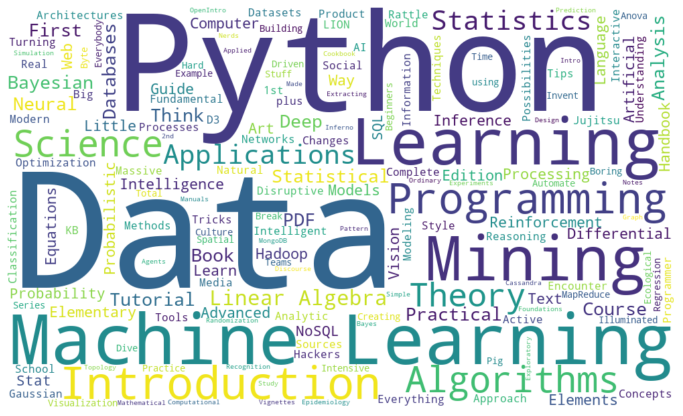

In [88]:
plot_wordcloud(text, "100ds_titles")

### Word cloud of the book description

In [89]:
text = ' '.join(desc for desc in df_books.description)
print('There are {} words in the combination of all description.'.format(len(set(text.split(' ')))))

There are 990 words in the combination of all description.


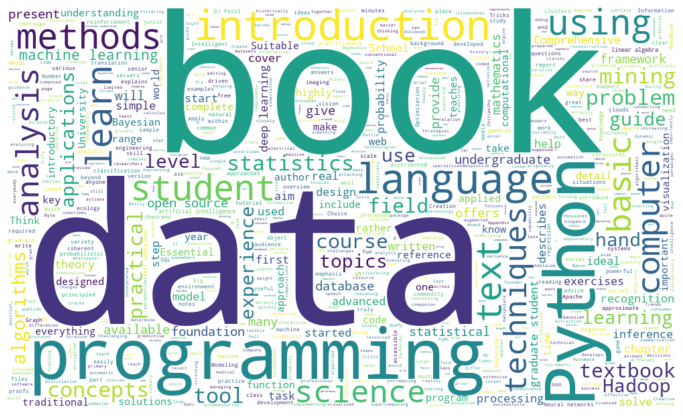

In [90]:
plot_wordcloud(text, "100ds_book_descriptions", ['None'], 1000) # add None to stopwords

### Histogram plot of book category

<AxesSubplot:xlabel='Count', ylabel='book_cat'>

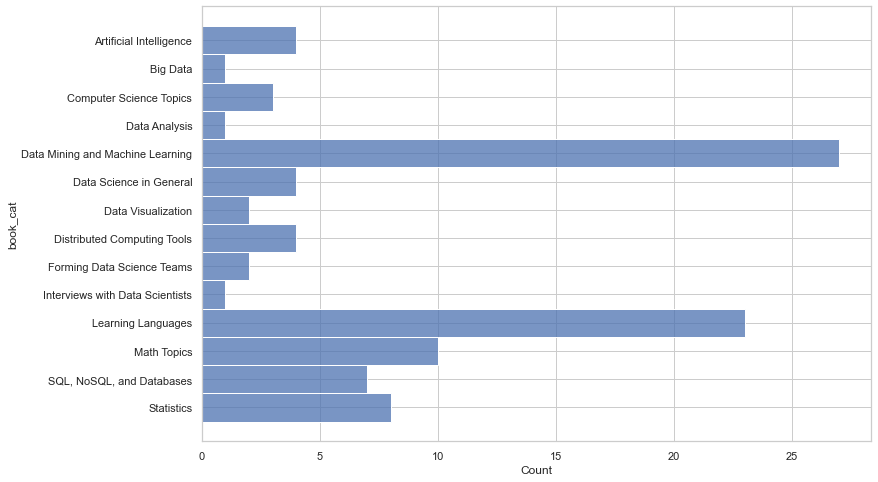

In [91]:
sns.histplot(data=df_books, y='book_cat', discrete=True)

### Histogram plot of year

<AxesSubplot:xlabel='year', ylabel='Count'>

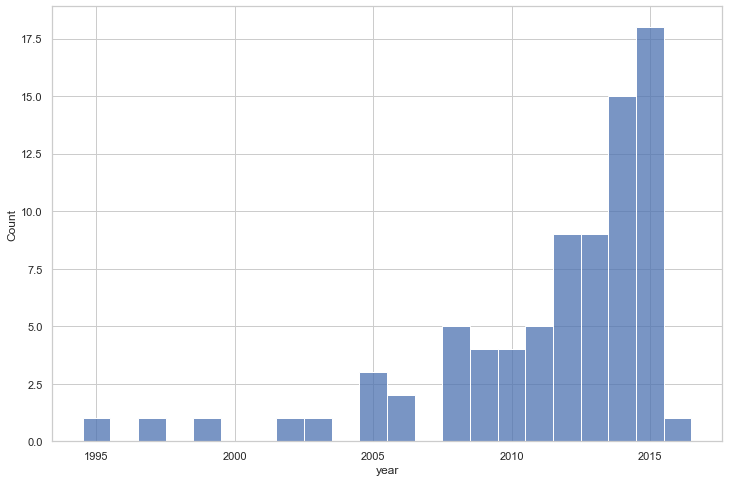

In [92]:
sns.histplot(data=df_books, x = 'year', discrete=True)

### Plot of rating and total ratings

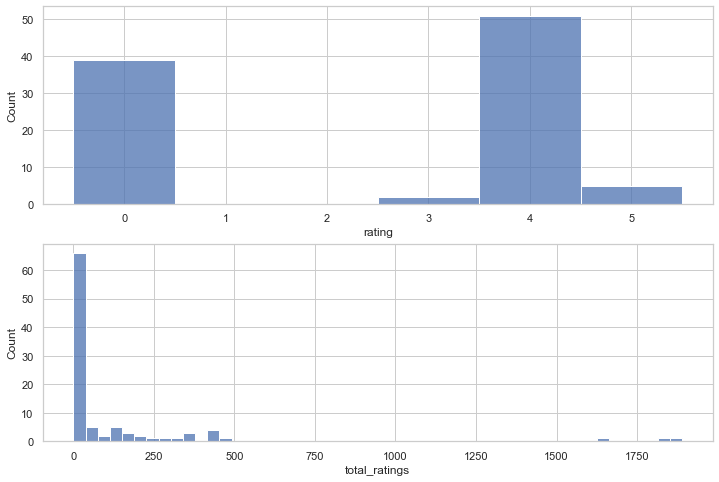

In [93]:
fig, axes = plt.subplots(2)

sns.histplot(data=df_books, x = 'rating', discrete=True, ax = axes[0]);
sns.histplot(data=df_books, x = 'total_ratings',ax = axes[1]);

<AxesSubplot:xlabel='total_ratings'>

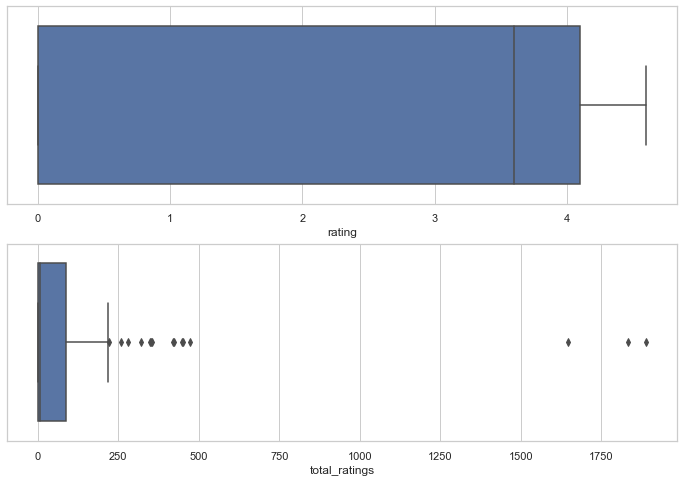

In [94]:
fig, axes = plt.subplots(2)

sns.boxplot(x = df_books['rating'], ax = axes[0])

sns.boxplot(x = df_books['total_ratings'], ax = axes[1])

### Scatterplot of rating and total ratings

<AxesSubplot:xlabel='rating', ylabel='total_ratings'>

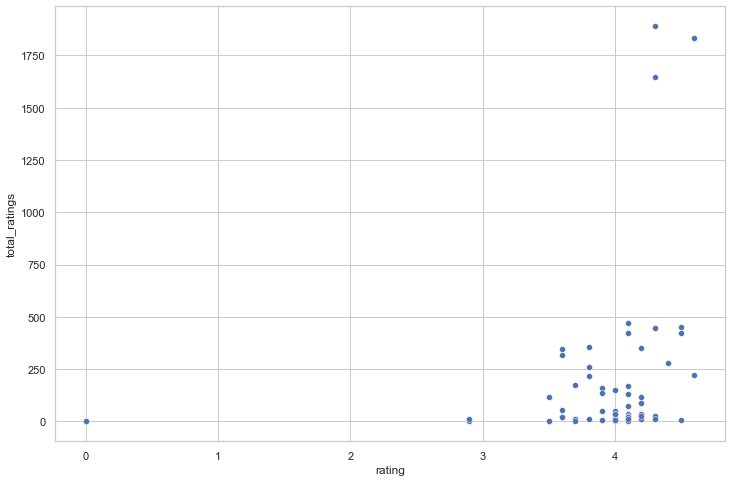

In [95]:
sns.scatterplot(data=df_books, x = 'rating', y = 'total_ratings')

### Strip plot of ratings and total_ratings

<AxesSubplot:xlabel='rating', ylabel='total_ratings'>

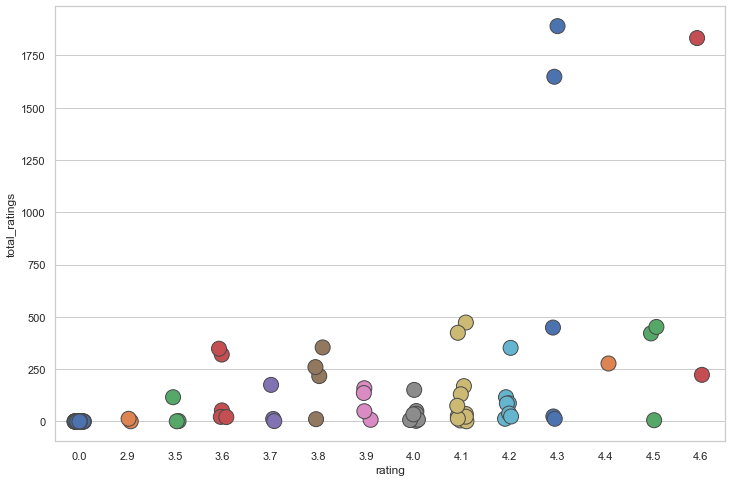

In [96]:
sns.stripplot(x='rating', y='total_ratings', data=df_books, linewidth=1, size=15, palette='deep')

Which are the tree books with high total raigns and rating from out plot?

In [97]:
df_books[(df_books['total_ratings'] > 1500) & (df_books['rating'] > 4.0)].iloc[:,:6]

,title,book_cat,author,year,rating,total_ratings
51,Automate the Boring Stuff with Python: Practic...,Learning Languages,Al Sweigart,2015,4.3,1890
89,An Introduction to Statistical Learning with A...,Statistics,"Gareth James, Daniela Witten, Trevor Hastie, &...",2013,4.6,1833
96,Pattern Recognition and Machine Learning,Artificial Intelligence,Christopher M. Bishop,2006,4.3,1648


Top 10 books in total ratings


In [98]:
df_books.sort_values(by=['total_ratings'], ascending=False)[:10].iloc[:,:6]

,title,book_cat,author,year,rating,total_ratings
51,Automate the Boring Stuff with Python: Practic...,Learning Languages,Al Sweigart,2015,4.3,1890
89,An Introduction to Statistical Learning with A...,Statistics,"Gareth James, Daniela Witten, Trevor Hastie, &...",2013,4.6,1833
96,Pattern Recognition and Machine Learning,Artificial Intelligence,Christopher M. Bishop,2006,4.3,1648
5,Natural Language Processing with Python,Computer Science Topics,Steven Bird,2009,4.1,473
31,Reinforcement Learning: An Introduction,Data Mining and Machine Learning,Richard S. Sutton & Andrew G. Barto,2012,4.5,452
60,Python for Everybody,Learning Languages,Dr. Charles R Severance,2016,4.3,449
40,Interactive Data Visualization for the Web,Data Visualization,Scott Murray,2013,4.1,424
19,"Information Theory, Inference, and Learning Al...",Data Mining and Machine Learning,David J.C. MacKay,2005,4.5,421
46,Data Driven: Creating a Data Culture,Forming Data Science Teams,"DJ Patil,‎ Hilary Mason",<NA>,3.8,354
0,"Artificial Intelligence A Modern Approach, 1st...",Artificial Intelligence,Stuart Russell,1995,4.2,352


Top 10 books in terms of total rating and ratings

In [99]:
df_books.sort_values(by=['rating', 'total_ratings'], ascending= False)[:10].iloc[:,:6]

,title,book_cat,author,year,rating,total_ratings
89,An Introduction to Statistical Learning with A...,Statistics,"Gareth James, Daniela Witten, Trevor Hastie, &...",2013,4.6,1833
49,Advanced R,Learning Languages,Hadley Wickham,2014,4.6,223
31,Reinforcement Learning: An Introduction,Data Mining and Machine Learning,Richard S. Sutton & Andrew G. Barto,2012,4.5,452
19,"Information Theory, Inference, and Learning Al...",Data Mining and Machine Learning,David J.C. MacKay,2005,4.5,421
73,Elementary Differential Equations,Math Topics,William F. Trench,2013,4.5,6
93,The Elements of Statistical Learning: Data Min...,Statistics,"Trevor Hastie, Robert Tibshirani, & Jerome Fri...",2008,4.4,281
51,Automate the Boring Stuff with Python: Practic...,Learning Languages,Al Sweigart,2015,4.3,1890
96,Pattern Recognition and Machine Learning,Artificial Intelligence,Christopher M. Bishop,2006,4.3,1648
60,Python for Everybody,Learning Languages,Dr. Charles R Severance,2016,4.3,449
26,Mining of Massive Datasets,Data Mining and Machine Learning,"Jure Leskovec, Anand Rajaraman, & Jeff Ullman",2014,4.3,24


Saving csv file 

In [100]:
df_books.to_csv("ds_books.csv", index=False)